#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de domingo, 28 de junho. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_28jun2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape

(501982, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501982 entries, 0 to 501981
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   regiao                 501982 non-null  object        
 1   estado                 501857 non-null  object        
 2   municipio              496508 non-null  object        
 3   coduf                  501982 non-null  int64         
 4   codmun                 498482 non-null  float64       
 5   codRegiaoSaude         496508 non-null  float64       
 6   nomeRegiaoSaude        496508 non-null  object        
 7   data                   501982 non-null  datetime64[ns]
 8   semanaEpi              501982 non-null  int64         
 9   populacaoTCU2019       500008 non-null  object        
 10  casosAcumulado         501982 non-null  int64         
 11  casosNovos             501982 non-null  int64         
 12  obitosAcumulado        501982 non-null  int6

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,FgMetro
447784,Sul,RS,Parobé,43,431405.0,43006.0,REGIAO 06 - VALE DO PARANHANA E COSTA SERR,2020-05-06,19,58272,0,0,0,0,NaN,NaN,1.0
426358,Sul,RS,Arroio dos Ratos,43,430110.0,43009.0,REGIAO 09,2020-05-12,20,14151,4,0,0,0,NaN,NaN,1.0
62294,Nordeste,MA,São Raimundo do Doca Bezerra,21,211163.0,21010.0,PEDREIRAS,2020-05-10,20,5237,0,0,0,0,NaN,NaN,0.0
122722,Nordeste,PB,Coxixola,25,250485.0,25005.0,5ª REGIAO,2020-04-26,18,1921,1,0,0,0,NaN,NaN,0.0
472802,Centro-Oeste,MT,Curvelândia,51,510343.0,51011.0,OESTE MATOGROSSENSE,2020-05-20,21,5219,4,0,0,0,NaN,NaN,0.0
274178,Sudeste,MG,Santa Rita de Ibitipoca,31,315940.0,31013.0,BARBACENA,2020-05-18,21,3425,0,0,0,0,NaN,NaN,0.0
62859,Nordeste,MA,Serrano do Maranhão,21,211178.0,21011.0,PINHEIRO,2020-05-11,20,10253,1,0,0,0,NaN,NaN,0.0
118366,Nordeste,PB,Aroeiras,25,250130.0,25015.0,15ª REGIAO,2020-06-27,26,19153,76,0,0,0,NaN,NaN,0.0
127659,Nordeste,PB,Mataraca,25,250930.0,25014.0,14ª REGIAO,2020-06-14,25,8434,55,3,1,0,NaN,NaN,0.0
120646,Nordeste,PB,Cachoeira dos Índios,25,250330.0,25009.0,9ª REGIAO,2020-04-18,16,10244,0,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    14338
RJ     9819
CE     5990
PA     4845
PE     4751
AM     2780
MA     1982
BA     1748
ES     1568
AL     1012
RN      937
PB      911
MG      899
SE      620
PI      615
PR      599
MT      563
RS      559
DF      548
RO      486
GO      435
AP      407
AC      353
SC      312
RR      281
TO      192
MS       72
Name: obitosAcumulado, dtype: int64

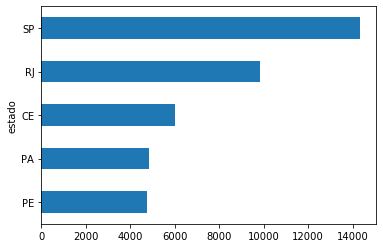

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [8]:
df['data'] = df['data'].dt.strftime('%d/%m')

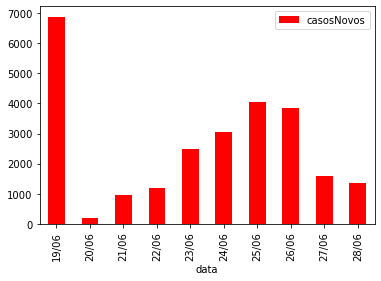

In [9]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

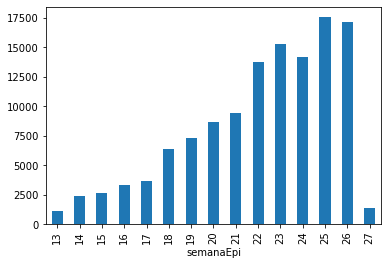

In [10]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

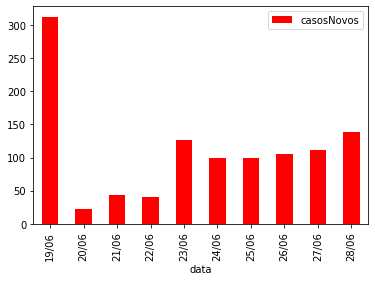

In [11]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

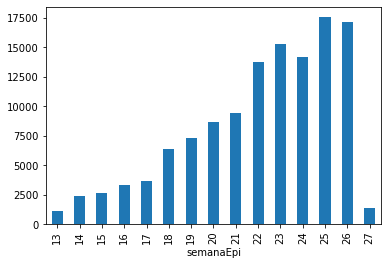

In [12]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')